# Problem 1: Polynomial model order determination

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
import torch
from sklearn import datasets

# for easier reading np
np.set_printoptions(precision=3,suppress=True)

Text(0, 0.5, 'Target')

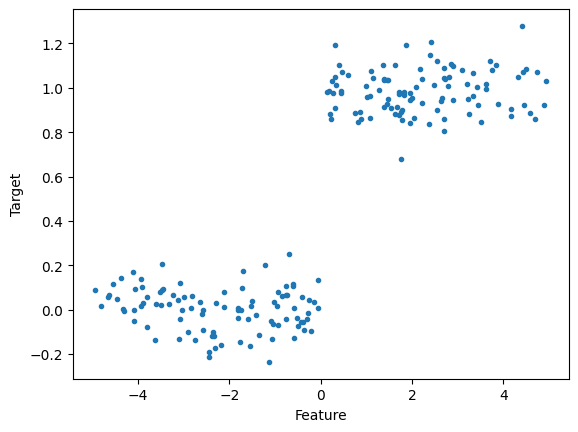

In [29]:
with open('./re_dat.csv', 'r') as f: 
  X = np.genfromtxt(f,delimiter=',',skip_header=1)
  X, y = X[:,:-1], X[:,-1]

plt.plot(X[:, 0], y, '.')
plt.xlabel('Feature')
plt.ylabel('Target')

##### Question 1-a

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

##### Questoin 1-b

In [31]:
kf = KFold(n_splits=5, shuffle=True)
max_order = 15
best_score = -np.inf
best_p = 1

for p in range(1, max_order + 1):
    model = make_pipeline(PolynomialFeatures(p), LinearRegression())
    scores = cross_val_score(model, X_train.reshape(-1, 1), y_train, cv=kf, scoring='r2')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_p = p

print(f"Best polynomial order: P* = {best_p}, Validation R^2 = {best_score:.4f}")


Best polynomial order: P* = 15, Validation R^2 = 0.9095


##### Questoin 1-c

In [32]:
best_model = make_pipeline(PolynomialFeatures(best_p), LinearRegression())
best_model.fit(X_train.reshape(-1, 1), y_train)
r2_score_test = best_model.score(X_test.reshape(-1, 1), y_test)
print(f"Test R^2 score: {r2_score_test:.4f}")

Test R^2 score: 0.9529


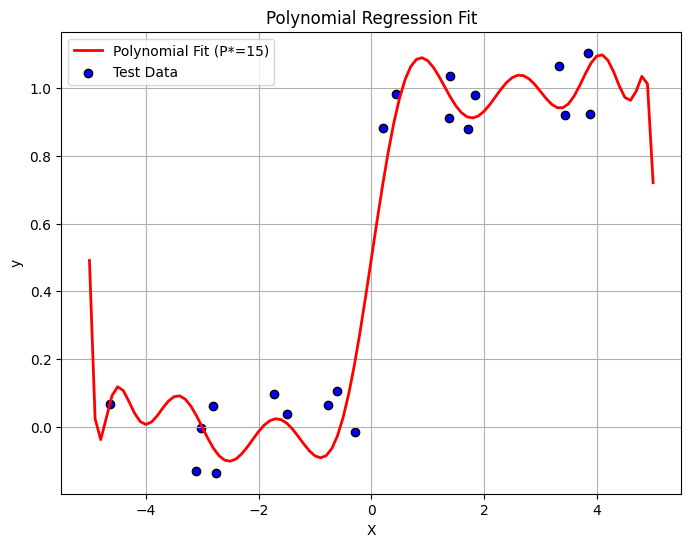

In [33]:
# Generate a smooth curve for the polynomial function
X_range = np.arange(-5, 5.1, 0.1).reshape(-1, 1)  # Grid from -5 to 5 with step 0.1
y_pred = best_model.predict(X_range)  # Predict values

# Plot the trained model
plt.figure(figsize=(8, 6))
plt.plot(X_range, y_pred, label=f"Polynomial Fit (P*={best_p})", color='red', linewidth=2)
plt.scatter(X_test, y_test, label="Test Data", color='blue', edgecolor='black')  # Overlay test data
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


##### Question 2-a

In [34]:
y

array([ 0.088,  0.018,  0.055,  0.068,  0.117,  0.048,  0.141,  0.002,
       -0.005,  0.17 , -0.051,  0.   ,  0.092,  0.015,  0.14 ,  0.103,
        0.029, -0.078,  0.057, -0.138,  0.024,  0.081,  0.021,  0.088,
        0.204,  0.092,  0.027,  0.064,  0.043, -0.131, -0.042,  0.122,
       -0.004,  0.058, -0.101,  0.006,  0.06 , -0.136,  0.035, -0.018,
       -0.094, -0.004, -0.19 , -0.213, -0.118, -0.099, -0.117, -0.173,
        0.029, -0.159,  0.011,  0.079,  0.   ,  0.009, -0.038, -0.148,
       -0.004,  0.096,  0.174, -0.043, -0.163,  0.017,  0.038, -0.023,
       -0.115,  0.202, -0.236, -0.051, -0.132, -0.064,  0.032,  0.014,
       -0.071,  0.078,  0.062,  0.065, -0.043,  0.105,  0.066,  0.251,
        0.106,  0.116,  0.005, -0.129, -0.037, -0.076, -0.056,  0.056,
       -0.056, -0.09 , -0.041, -0.016,  0.041, -0.095,  0.032,  0.008,
        0.132,  0.979,  0.987,  0.883,  0.861,  1.031,  0.975,  1.05 ,
        0.911,  1.191,  1.012,  1.105,  0.977,  0.984,  1.069,  1.056,
      

In [35]:

# Load Iris dataset
iris = datasets.load_iris()
X = torch.tensor(iris.data[:, :4], dtype=torch.float32)  # Use all 4 features
y = torch.tensor((iris.target == 2).astype(float), dtype=torch.float32)  # Binary classification (class 2 or not)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

# Data iterator
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = indices[i:i + batch_size]
        yield features[j], labels[j]

# Initialize model parameters
w = torch.nn.Parameter(torch.zeros((4, 1)), requires_grad=True)
b = torch.nn.Parameter(torch.zeros((1, 1)), requires_grad=True)
torch.nn.init.normal_(w, mean=0, std=0.01)

# Define the logistic regression model
def logistic_regression(X, w, b):
    return torch.sigmoid(X @ w + b)  # Sigmoid function for probability output

# Binary cross-entropy loss
def binary_cross_entropy(y_hat, y):
    return -torch.mean(y * torch.log(y_hat + 1e-8) + (1 - y) * torch.log(1 - y_hat + 1e-8))

# Stochastic gradient descent optimizer
def sgd(params, grads, lr):
    for p, g in zip(params, grads):
        p.data -= lr * g

# Training setup
lr = 0.1
batch_size = 10
num_epochs = 50
net = logistic_regression
loss = binary_cross_entropy

# Train model
for epoch in range(num_epochs):
    for X_batch, y_batch in data_iter(batch_size, X_train, y_train):
        y_hat = net(X_batch, w, b).squeeze()  # Get predictions
        l = loss(y_hat, y_batch)  # Compute loss
        l.backward()  # Backpropagation
        sgd([w, b], [w.grad, b.grad], lr)  # Update weights
        w.grad = None
        b.grad = None

    # Evaluate model
    with torch.no_grad():
        y_train_pred = (net(X_train, w, b) > 0.5).squeeze().float()
        y_test_pred = (net(X_test, w, b) > 0.5).squeeze().float()
        train_acc = (y_train_pred == y_train).float().mean()
        test_acc = (y_test_pred == y_test).float().mean()

    print(f'Epoch {epoch+1:03d}, Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}')

# Final parameters
print('Intercept =', b.detach().numpy())
print('Coefficients =', w.detach().numpy())


Epoch 001, Train Accuracy: 0.667, Test Accuracy: 0.700
Epoch 002, Train Accuracy: 0.658, Test Accuracy: 0.700
Epoch 003, Train Accuracy: 0.667, Test Accuracy: 0.700
Epoch 004, Train Accuracy: 0.658, Test Accuracy: 0.700
Epoch 005, Train Accuracy: 0.942, Test Accuracy: 0.967
Epoch 006, Train Accuracy: 0.992, Test Accuracy: 0.967
Epoch 007, Train Accuracy: 0.775, Test Accuracy: 0.800
Epoch 008, Train Accuracy: 0.950, Test Accuracy: 0.967
Epoch 009, Train Accuracy: 0.933, Test Accuracy: 0.967
Epoch 010, Train Accuracy: 0.933, Test Accuracy: 0.933
Epoch 011, Train Accuracy: 0.783, Test Accuracy: 0.833
Epoch 012, Train Accuracy: 0.942, Test Accuracy: 0.967
Epoch 013, Train Accuracy: 0.933, Test Accuracy: 0.833
Epoch 014, Train Accuracy: 0.850, Test Accuracy: 0.833
Epoch 015, Train Accuracy: 0.925, Test Accuracy: 0.967
Epoch 016, Train Accuracy: 0.917, Test Accuracy: 0.833
Epoch 017, Train Accuracy: 0.950, Test Accuracy: 0.933
Epoch 018, Train Accuracy: 0.992, Test Accuracy: 0.933
Epoch 019,

##### Question 3-a

$$
X = 
\begin{bmatrix}
1 & 0.5 & 0.8 \\
1 & -1 & 0.6
\end{bmatrix}
$$

##### Question 3-b

$$
z = 
Xw
=
\begin{bmatrix}
1 & 0.5 & 0.8 \\
1 & -1 & 0.6
\end{bmatrix}
\begin{bmatrix}
0.4  \\ -1.1 \\ 0.6
\end{bmatrix}
= 
\begin{bmatrix}
0.33  \\ 1.86
\end{bmatrix}
$$

##### Question 3-c

$$
I(\mathbf{w})
=
\frac{1}{2K} \sum_{k=1}^{K}(u(k) - y(k))
$$

$$
I(\mathbf{w}) = \frac{1}{4} \left[(0.33 - 1)^2 + (1.86 - 0)^2\right] = \frac{1}{4} \left[0.4489 + 3.4596\right] = \frac{3.9085}{4} = 0.977125
$$

##### Question 3-d

$$
\mathbf{e} = \begin{bmatrix}
f(u(1)) - y(1) \\
f(u(2)) - y(2)
\end{bmatrix}
= \begin{bmatrix}
0.33 - 1 \\
1.86 - 0
\end{bmatrix}
= \begin{bmatrix}
-0.67 \\
1.86
\end{bmatrix}
$$

##### Question 3-e

$$
p = 
\begin{bmatrix}
1 \\ 1 
\end{bmatrix}
$$

##### Question 3-f